In [1]:
import numpy as np
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage import io
import glob
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess images consistently
data = []
label = []

In [3]:
# Adjust this path to where your images are stored
image_paths = glob.glob('./train2/*/*.jpg')
for image_path in tqdm(image_paths, desc="Processing Images"):
    image = io.imread(image_path)
    img_gray = rgb2gray(image)
    img_resized = resize(img_gray, (128, 128), anti_aliasing=True)
    img_normalized = img_resized / 255.0  # Normalize before flattening
    img_flattened = img_normalized.flatten()
    data.append(img_flattened)
    label.append(1 if 'cat' in image_path else 0)


Processing Images: 100%|██████████████████████████████████████████████████████████| 4002/4002 [00:24<00:00, 163.01it/s]


In [5]:
data = np.array(data)
label = np.array(label)

print(f"Data shape: {data.shape}, Label shape: {label.shape}")

Data shape: (4002, 16384), Label shape: (4002,)


In [6]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.3, random_state=42)
print(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")

Training set shape: (2801, 16384), Testing set shape: (1201, 16384)


In [7]:
# SVM Classifier
clf = SVC(kernel='linear', random_state=42)
clf.fit(X_train, y_train)
print("Model training completed!")

Model training completed!


In [8]:
# Evaluation
y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.73      0.61       580
           1       0.60      0.38      0.47       621

    accuracy                           0.55      1201
   macro avg       0.56      0.56      0.54      1201
weighted avg       0.57      0.55      0.54      1201

Confusion Matrix:
[[424 156]
 [383 238]]


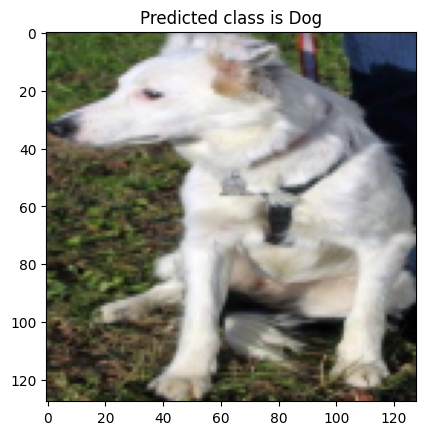

In [11]:
# Example prediction
def process_image(image_path):
    img = io.imread(image_path)
    img_gray = rgb2gray(img)
    img_resized = resize(img_gray, (128, 128), anti_aliasing=True)
    img_normalized = img_resized / 255.0
    img_flattened = img_normalized.flatten()
    return img_flattened

image_path = './train2/dog/dog.108.jpg'  # Adjust this path for your test image
processed_image = process_image(image_path)
predicted = clf.predict([processed_image])[0]

# Display the processed test image and its prediction
plt.imshow(resize(io.imread(image_path), (128, 128), anti_aliasing=True), cmap='gray')
plt.title(f'Predicted class is {"Cat" if predicted == 1 else "Dog"}')
plt.show()